# Feature Selection Using Pearson Correlation and Filtering Method

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

### Load Dataset for Modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointments2.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 17)


,patient_id,appointment_id,gender_yn,age,neighborhood,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,dayofweek,time_between_sch_appt,day_after_holiday_yn,repeat_patient_yn,neighborhood_median_income,no_show_yn
0,8.320000e+14,5030230,F,51,RESISTÊNCIA,0,0,0,0,0,1,3,176,0,1,510,0
1,9.160000e+13,5122866,M,34,VILA RUBIM,0,1,0,0,0,1,1,151,1,1,510,1
2,1.220000e+12,5134197,F,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,5,179,0,0,510,1
3,3.190000e+13,5134220,F,48,MARUÍPE,0,1,1,0,0,1,5,179,0,0,800,0
4,9.580000e+12,5134223,F,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,5,179,0,0,510,0


### Drop Irrelevant Columns

In [3]:
data = data.drop(['patient_id', 'appointment_id'], axis=1)

print(f"Shape of the data is: {data.shape}")

Shape of the data is: (110521, 15)


In [4]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')


### Generate Correlation Matrix

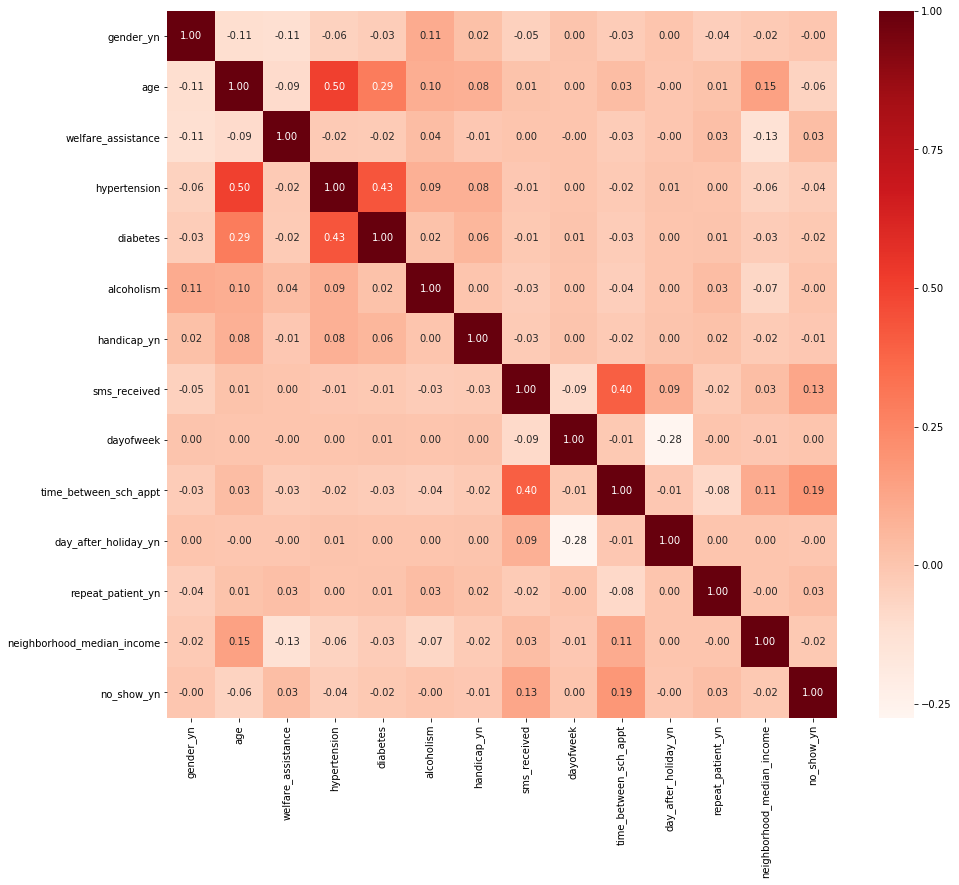

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(15,13))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".2f", cmap=plt.cm.Reds)

plt.savefig("..\images\correlation_matrix.png")


In [6]:
#check out correlation data
corr

,repeat_patient_yn,gender_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,wednesday_yn,thursday_yn,friday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
repeat_patient_yn,1.000000,-0.037585,0.005211,0.065389,-0.067382,0.002087,-0.002012,0.002305,-0.008936,0.006363,...,0.012637,0.034824,-0.017532,0.021680,0.000550,0.007310,0.034163,0.015978,-0.026982,0.024387
gender_yn,-0.037585,1.000000,0.037460,-0.018664,-0.019888,0.003359,-0.006024,-0.001746,0.003849,0.001553,...,-0.074019,-0.070419,-0.032985,-0.061968,-0.057997,-0.034580,0.109453,0.021407,-0.017610,0.002987
same_day_appt_yn,0.005211,0.037460,1.000000,-0.477785,-0.550353,0.009130,0.014209,-0.008722,-0.006217,-0.009538,...,0.010157,-0.021946,-0.059454,0.100776,-0.041915,-0.016804,0.042134,0.019305,-0.492169,-0.284333
within_week_appt_yn,0.065389,-0.018664,-0.477785,1.000000,-0.470518,-0.002198,-0.000316,0.019043,-0.003220,-0.016089,...,-0.023129,0.025854,0.078002,-0.034256,0.081786,0.057214,-0.003126,0.008562,0.050198,0.066464
advanced_appt_yn,-0.067382,-0.019888,-0.550353,-0.470518,1.000000,-0.007082,-0.013973,-0.009338,0.009306,0.024873,...,0.011780,-0.002528,-0.014417,-0.068667,-0.035630,-0.037499,-0.039351,-0.027529,0.446652,0.222430
monday_yn,0.002087,0.003359,0.009130,-0.002198,-0.007082,1.000000,-0.278299,-0.281249,-0.219418,-0.233307,...,-0.003828,-0.003077,-0.001144,0.002752,-0.005902,-0.006660,0.002454,-0.003781,-0.005770,0.005988
tuesday_yn,-0.002012,-0.006024,0.014209,-0.000316,-0.013973,-0.278299,1.000000,-0.301793,-0.235445,-0.250349,...,0.005538,-0.001700,0.002529,-0.013511,0.004914,0.003839,-0.005654,0.001515,0.097440,-0.003645
wednesday_yn,0.002305,-0.001746,-0.008722,0.019043,-0.009338,-0.281249,-0.301793,1.000000,-0.237941,-0.253003,...,-0.004252,0.002168,-0.000973,-0.003137,-0.003327,-0.002731,0.000637,-0.005203,0.025423,-0.006988
thursday_yn,-0.008936,0.003849,-0.006217,-0.003220,0.009306,-0.219418,-0.235445,-0.237941,1.000000,-0.197381,...,-0.001810,0.005846,-0.001721,0.001519,0.004342,-0.003428,-0.001069,0.004984,-0.036226,-0.008304
friday_yn,0.006363,0.001553,-0.009538,-0.016089,0.024873,-0.233307,-0.250349,-0.253003,-0.197381,1.000000,...,0.004608,-0.003139,0.000742,0.014199,-0.000315,0.008786,0.003854,0.003348,-0.095800,0.013344


In [7]:
corr_matrix_df = pd.DataFrame(corr)

In [8]:
#Export to csv 
corr_matrix_df.to_csv('../data/cleanData/modelResults/corr_matrix_df.csv', index = False, header=True)

In [9]:
# check out the more highly correlated features
#Correlation with output variable
corr_target = abs(corr['no_show_yn'])

#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

no_show_yn    1.0
Name: no_show_yn, dtype: float64

### Remove Columns with Correlation Extremes

From looking through our Correlation Matrix data, it appears that the the most extreme correlation values are less than 0.8. Let's remove those columns.

In [10]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.8:
            if columns[j]:
                columns[j] = False

### View Columns Selected

In [11]:
selected_columns = data.columns[columns]
selected_columns.shape

(25,)

In [12]:
data = data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107564 entries, 0 to 107563
Data columns (total 25 columns):
repeat_patient_yn                107564 non-null int64
gender_yn                        107564 non-null int64
same_day_appt_yn                 107564 non-null int64
within_week_appt_yn              107564 non-null int64
advanced_appt_yn                 107564 non-null int64
monday_yn                        107564 non-null int64
tuesday_yn                       107564 non-null int64
wednesday_yn                     107564 non-null int64
thursday_yn                      107564 non-null int64
friday_yn                        107564 non-null int64
saturday_yn                      107564 non-null int64
neighborhood_income_lower_yn     107564 non-null int64
neighborhood_income_middle_yn    107564 non-null int64
day_after_holiday_yn             107564 non-null int64
child_yn                         107564 non-null int64
young_adult_yn                   107564 non-null int64
adult_yn 

It appears that higher income neighborhood data was removed. We now have 25 columns of data.

In [13]:
# Remove target column
selected_columns = selected_columns[:1].values
selected_columns

array(['repeat_patient_yn'], dtype=object)

### Select Columns based on p-value

In [14]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [15]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,:1].values, data.iloc[:,0].values, SL, selected_columns)

In [16]:
#move results to dataframe
result = pd.DataFrame()
result['noshow'] = data.iloc[:,0]

In [17]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.head()

,repeat_patient_yn
0,1
1,0
2,1
3,0
4,1


### Plot selected columns to see distributions

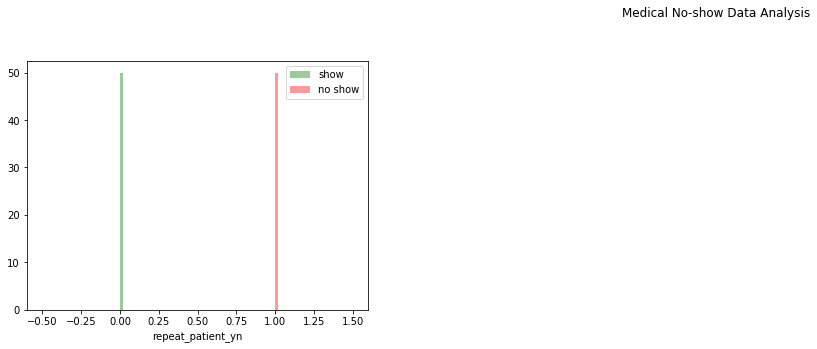

In [18]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['noshow']==0], color='g', label = 'show')
    sns.distplot(data[i][result['noshow']==1], color='r', label = 'no show')
    plt.legend(loc='best')
fig.suptitle('Medical No-show Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


### Build SVC Model 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [20]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
prediction = svc.predict(x_test)

In [22]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

1.0
